In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
# Load the filtered 9-column dataset
file_path = 'master_dataset_all_cycles_complete.csv'
df = pd.read_csv(file_path)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset shape: (9343, 9)
Columns: ['SEQN', 'Cycle', 'RIAGENDR', 'RIDAGEYR', 'BMXBMI', 'BPXSY1', 'LBXGLU', 'LBXSCH', 'Log_UACR']


,SEQN,Cycle,RIAGENDR,RIDAGEYR,BMXBMI,BPXSY1,LBXGLU,LBXSCH,Log_UACR
0,73559.0,2013-2014,1.0,72.0,28.9,140.0,193.0,127.0,2.354228
1,73561.0,2013-2014,2.0,73.0,19.7,136.0,107.0,207.0,5.156005
2,73564.0,2013-2014,2.0,61.0,35.7,118.0,110.0,167.0,2.060514
3,73581.0,2013-2014,1.0,50.0,23.6,138.0,110.0,203.0,1.599388
4,73596.0,2013-2014,2.0,57.0,38.3,128.0,107.0,150.0,2.797281


In [3]:
df.info()

df.describe().T



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9343 entries, 0 to 9342
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9343 non-null   float64
 1   Cycle     9343 non-null   object 
 2   RIAGENDR  9343 non-null   float64
 3   RIDAGEYR  9343 non-null   float64
 4   BMXBMI    9343 non-null   float64
 5   BPXSY1    9343 non-null   float64
 6   LBXGLU    9343 non-null   float64
 7   LBXSCH    9343 non-null   float64
 8   Log_UACR  9343 non-null   float64
dtypes: float64(8), object(1)
memory usage: 657.1+ KB


,count,mean,std,min,25%,50%,75%,max
SEQN,9343.0,112832.428128,22933.534380,73559.000000,89827.000000,117599.00000,134563.500000,142309.000000
RIAGENDR,9343.0,1.531200,0.499052,1.000000,1.000000,2.00000,2.000000,2.000000
RIDAGEYR,9343.0,56.462485,14.595050,18.000000,47.000000,57.00000,67.000000,80.000000
BMXBMI,9343.0,29.724532,7.183501,11.100000,24.800000,28.60000,33.100000,82.900000
BPXSY1,9343.0,125.762389,18.738966,66.000000,113.000000,125.00000,135.000000,236.000000
LBXGLU,9343.0,113.567377,38.156658,21.000000,96.000000,104.00000,114.000000,561.000000
LBXSCH,9343.0,190.403725,41.998776,63.000000,164.000000,184.00000,215.000000,639.000000
Log_UACR,9343.0,2.358966,1.198502,-1.514128,1.656321,2.11505,2.741807,9.148971


In [4]:
df.shape

(9343, 9)

In [5]:
df.nunique()

SEQN        9343
Cycle          5
RIAGENDR       2
RIDAGEYR      63
BMXBMI       429
BPXSY1       144
LBXGLU       294
LBXSCH       280
Log_UACR    3152
dtype: int64

### Data Cleaning


In [6]:
# BETTER APPROACH: Only drop nulls for essential columns
# This keeps more data from all cycles!

# Option 1: Don't drop nulls at all - work with the data as-is
print("Before cleaning:")
print(f"Total rows: {len(df):,}")
print(f"Cycles: {df['Cycle'].value_counts().sort_index()}")

# Option 2: Only drop rows where essential columns are missing
essential_columns = ['SEQN', 'Cycle', 'RIAGENDR', 'RIDAGEYR']
df_clean = df.dropna(subset=essential_columns)

print("\nAfter dropping nulls only for essential columns:")
print(f"Total rows: {len(df_clean):,}")
print(f"Cycles: {df_clean['Cycle'].value_counts().sort_index()}")

# Use df_clean for analysis instead of df
df = df_clean.copy()

print("\nMissing values per column:")
print(df.isna().sum())

Before cleaning:
Total rows: 9,343
Cycles: Cycle
2013-2014    1816
2015-2016     851
2017-2018     806
2017-2020    2308
2021-2022    3562
Name: count, dtype: int64

After dropping nulls only for essential columns:
Total rows: 9,343
Cycles: Cycle
2013-2014    1816
2015-2016     851
2017-2018     806
2017-2020    2308
2021-2022    3562
Name: count, dtype: int64

Missing values per column:
SEQN        0
Cycle       0
RIAGENDR    0
RIDAGEYR    0
BMXBMI      0
BPXSY1      0
LBXGLU      0
LBXSCH      0
Log_UACR    0
dtype: int64


In [7]:
df.duplicated().sum()

np.int64(0)

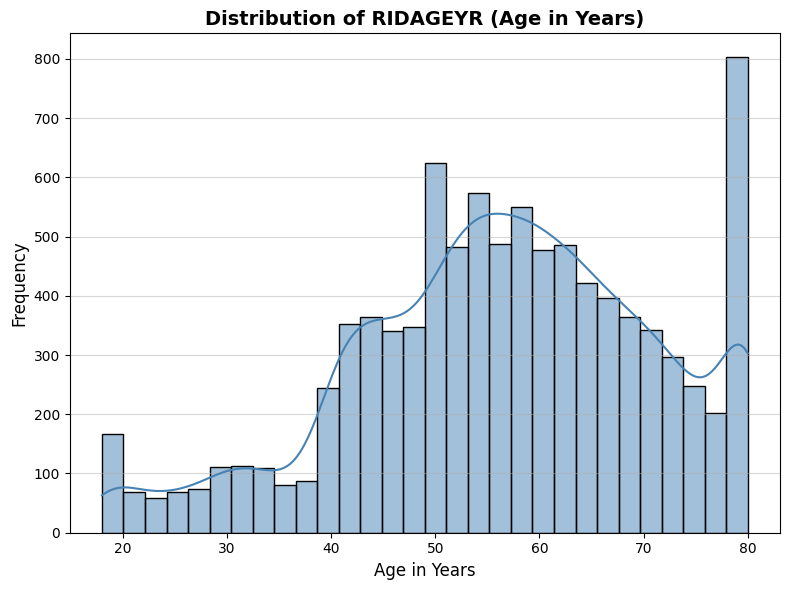

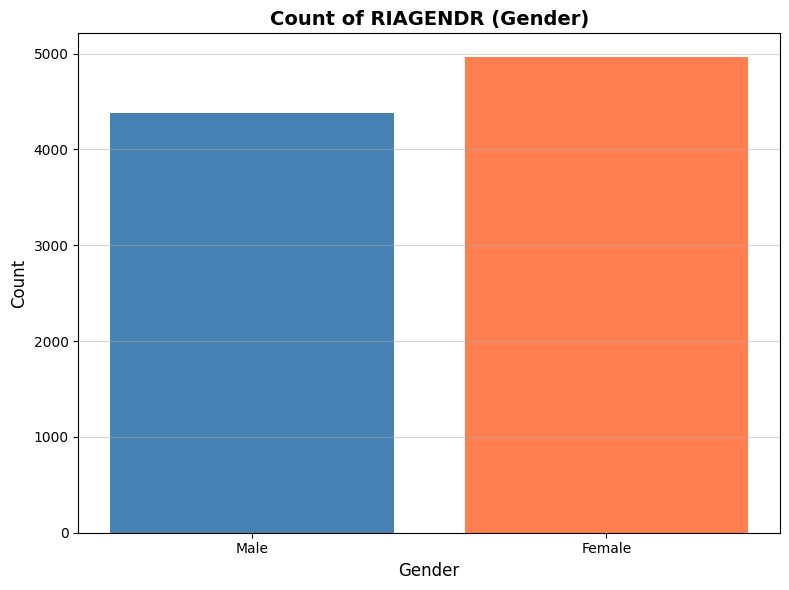

C:\Users\dell\AppData\Local\Temp\ipykernel_82928\1226671558.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Cycle', data=df, order=cycle_order, palette='viridis')


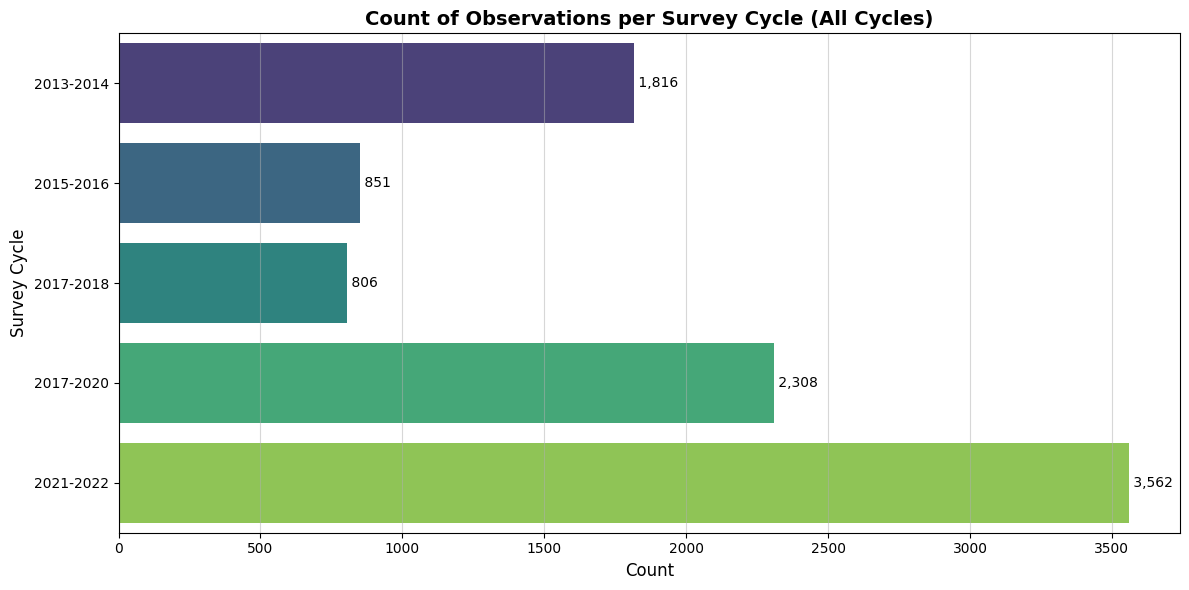


DATA SUMMARY BY CYCLE

2013-2014:
  Total rows: 1,816
  Unique participants: 1,816

2015-2016:
  Total rows: 851
  Unique participants: 851

2017-2018:
  Total rows: 806
  Unique participants: 806

2017-2020:
  Total rows: 2,308
  Unique participants: 2,308

2021-2022:
  Total rows: 3,562
  Unique participants: 3,562


In [8]:
# Convert 'Cycle' to string for proper categorical treatment
df['Cycle'] = df['Cycle'].astype(str)

# --- Histogram for Age (Numerical Variable) ---
age_column = 'RIDAGEYR'
plt.figure(figsize=(8, 6))
sns.histplot(df[age_column].dropna(), bins=30, kde=True, color='steelblue')
plt.title(f'Distribution of {age_column} (Age in Years)', fontsize=14, fontweight='bold')
plt.xlabel('Age in Years', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Count Plot for Gender (Categorical Variable) ---
gender_column = 'RIAGENDR'
# 1=Male, 2=Female (based on standard NHANES documentation)
plt.figure(figsize=(8, 6))
gender_counts = df[gender_column].dropna().value_counts()
plt.bar(['Male', 'Female'], [gender_counts.get(1.0, 0), gender_counts.get(2.0, 0)], color=['steelblue', 'coral'])
plt.title(f'Count of {gender_column} (Gender)', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Count Plot for Survey Cycle (ALL CYCLES) ---
plt.figure(figsize=(12, 6))
cycle_order = sorted(df['Cycle'].dropna().unique())
sns.countplot(y='Cycle', data=df, order=cycle_order, palette='viridis')
plt.title('Count of Observations per Survey Cycle (All Cycles)', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Survey Cycle', fontsize=12)
plt.grid(axis='x', alpha=0.5)

# Add count labels on bars
for i, cycle in enumerate(cycle_order):
    count = len(df[df['Cycle'] == cycle])
    plt.text(count, i, f' {count:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*60)
print("DATA SUMMARY BY CYCLE")
print("="*60)
for cycle in cycle_order:
    cycle_data = df[df['Cycle'] == cycle]
    print(f"\n{cycle}:")
    print(f"  Total rows: {len(cycle_data):,}")
    print(f"  Unique participants: {cycle_data['SEQN'].nunique():,}")

In [9]:
df['UACR_Raw'] = np.exp(df['Log_UACR'])
